<a href="https://colab.research.google.com/github/xoxoreyniel/DSC1105/blob/main/DSC1105_FA3_Awit%2C_JT%3B_Deloyola%2C_JR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Pulling a small sample (5,000 rows) to keep it lightning fast
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
df_raw = pd.read_parquet(url).head(5000)

print("Data Loaded!")

Data Loaded!


       trip_distance  total_amount  fare_per_mile
count    4906.000000   4906.000000    4906.000000
mean        3.320762     27.059531      14.033564
std         3.754856     17.846323     107.508809
min         0.010000      5.500000       2.830189
25%         1.220000     16.320000       7.815896
50%         2.090000     21.380000      10.330476
75%         3.845000     31.400000      13.800000
max        35.480000    297.070000    7400.000000


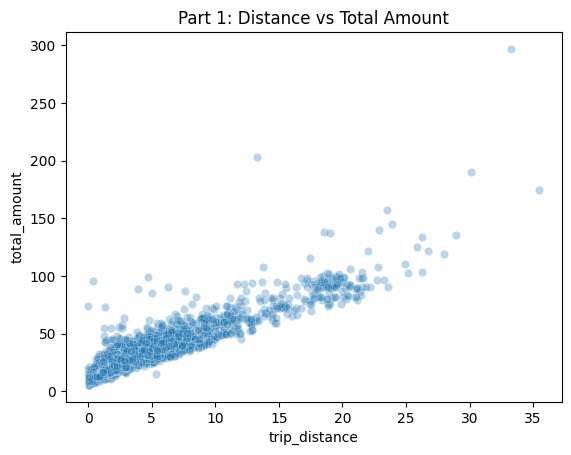

Correlation coefficient: 0.9256


In [7]:
# Convert to time objects
df_raw['tpep_pickup_datetime'] = pd.to_datetime(df_raw['tpep_pickup_datetime'])
df_raw['tpep_dropoff_datetime'] = pd.to_datetime(df_raw['tpep_dropoff_datetime'])

# Clean data and derive variables
df = df_raw[(df_raw['trip_distance'] > 0) & (df_raw['total_amount'] > 0)].copy()
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['fare_per_mile'] = df['total_amount'] / df['trip_distance']

# Output: Summary and Plot
print(df[['trip_distance', 'total_amount', 'fare_per_mile']].describe())
sns.scatterplot(data=df, x='trip_distance', y='total_amount', alpha=0.3)
plt.title("Part 1: Distance vs Total Amount")
plt.show()

print(f"Correlation coefficient: {df['trip_distance'].corr(df['total_amount']):.4f}")

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 2.935e+04
Date:                Sun, 22 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:06:10   Log-Likelihood:                -16331.
No. Observations:                4906   AIC:                         3.267e+04
Df Residuals:                    4904   BIC:                         3.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4500      0.129     96.717

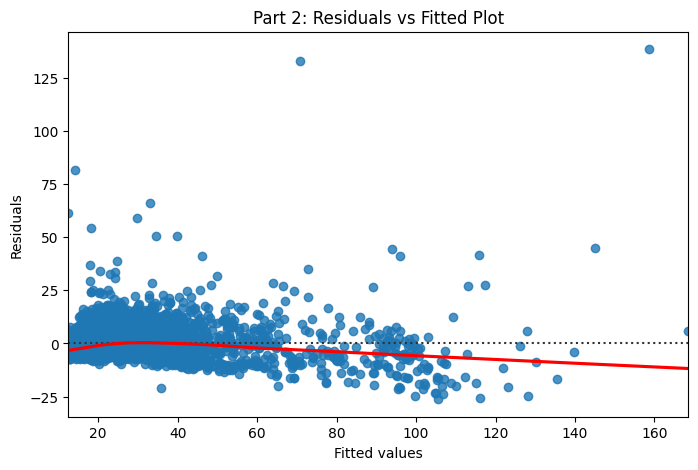

In [8]:
# Fit the model
X = sm.add_constant(df['trip_distance'])
y = df['total_amount']
model = sm.OLS(y, X).fit()

# Report Results
print(model.summary())

# Plot Residuals vs Fitted
plt.figure(figsize=(8,5))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title("Part 2: Residuals vs Fitted Plot")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

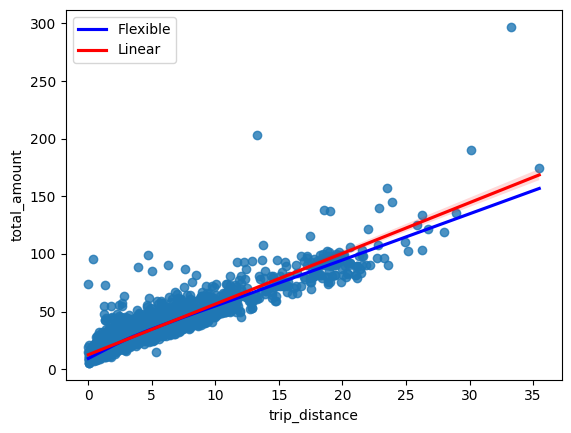

10 Most Influential Trips:
      trip_distance  total_amount   influence
2513          33.25        297.07  138.337947
4121          13.24        203.46  132.761167
1516           0.38         95.70   81.578239
4690           4.70         99.30   66.172566
3731           0.01         74.00   61.506039
2207           3.94         88.80   59.016157
3858           1.33         72.75   54.448751
4180           5.02         85.25   50.714738
4076           6.24         90.25   50.347396
852           30.15        189.98   44.886277


In [10]:
# Part 3: Flexible vs Linear Plot
sns.regplot(data=df, x='trip_distance', y='total_amount', lowess=True, line_kws={'color':'blue', 'label':'Flexible'})
sns.regplot(data=df, x='trip_distance', y='total_amount', scatter=False, color='red', label='Linear')
plt.legend()
plt.show()

# Part 4: List 10 most influential trips (based on largest errors)
df['influence'] = np.abs(model.resid)
print("10 Most Influential Trips:")
print(df.sort_values(by='influence', ascending=False)[['trip_distance', 'total_amount', 'influence']].head(10))

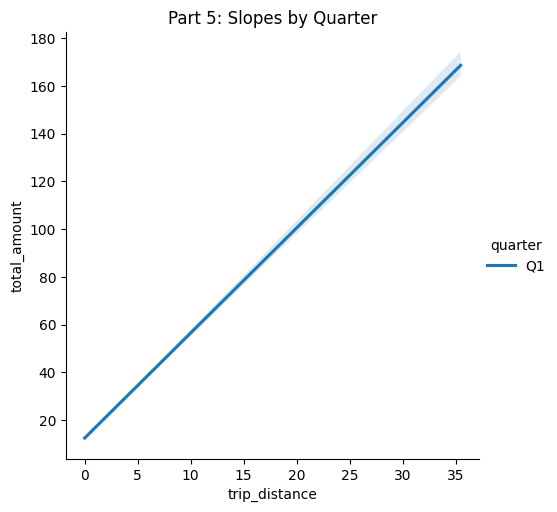

In [11]:
# Create quarter column
df['month'] = df['tpep_pickup_datetime'].dt.month
df['quarter'] = 'Q1'

# Plot
sns.lmplot(data=df, x='trip_distance', y='total_amount', hue='quarter', scatter=False)
plt.title("Part 5: Slopes by Quarter")
plt.show()

Part 6: Reflection

Inadequacy: Linear models are inadequate because they assume a perfectly straight relationship, ignoring fixed base fares and surge pricing.

Flexible Regression: We use flexible regression to better capture non-linearities in human behavior and pricing rules.

Outliers: Outliers in large datasets bias the interpretation by skewing the "average" price, making the model less representative of a typical taxi ride.